In [110]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. drop all null rows
2. start date > end data
3. end date: 
    churned && (null) ? delete : keep
             

In [50]:
# Load data as dataframe, total 92226 data included.
data = pd.read_csv('data.csv').dropna(how='all')
print(len(data.index))
data.head(5)

92226


,company_id,Start_date,End_date,state,Category,MRR
0,1.0,2017-01-16,2017-03-16,Churned,Heating & Air Conditioning,175.000000
1,2.0,2017-10-17,2017-11-04,Churned,Appliance Repair,100.000000
2,3.0,2016-07-11,2016-07-14,Churned,Snow Removal,121.458333
3,4.0,2016-07-18,2016-07-31,Churned,Roofing,102.500000
4,4.0,2016-08-02,NaN,Active,Roofing,102.500000


In [51]:
# Clear invalid data with Start_date later than End_date
indexNames = data[ (data['Start_date'] >= data['End_date']) ].index
data.drop(indexNames , inplace=True)
data

,company_id,Start_date,End_date,state,Category,MRR
0,1.0,2017-01-16,2017-03-16,Churned,Heating & Air Conditioning,175.000000
1,2.0,2017-10-17,2017-11-04,Churned,Appliance Repair,100.000000
2,3.0,2016-07-11,2016-07-14,Churned,Snow Removal,121.458333
3,4.0,2016-07-18,2016-07-31,Churned,Roofing,102.500000
4,4.0,2016-08-02,NaN,Active,Roofing,102.500000
...,...,...,...,...,...,...
92220,68752.0,2016-11-03,NaN,Active,Pest & Animal Control,25.000000
92221,68753.0,2017-04-07,2017-04-19,Churned,Junk Removal,170.000000
92222,68754.0,2017-04-07,2017-04-20,Churned,Junk Removal,170.000000
92223,68755.0,2017-10-12,2017-10-21,Churned,Alarm Systems,250.000000


## Churned MRR

In [227]:
# Filter the data based on monthly End_date, for understanding churned MRR.
# Str: month variable
def filterByEndMonthly(Str):
    rowlist = []

    for index, row in data.iterrows():
        if not pd.isnull(row['End_date']):
            if row['End_date'][0:7] == Str:
                rowlist.append(row)
                #num += 1
                #mrr += row['MRR']
    subDF = pd.DataFrame(rowlist) 
    return subDF

In [228]:
# Loop over 12 months and store each filtered dataframe as a dictionary.
def returnResult(churned, yr):
    for i in range (13):
        if i != 0:
            if i<10:
                cond = yr+'-0'+str(i)
                df= filterByEndMonthly(cond)
                
            else:
                cond = yr+'-'+str(i)
                df = filterByEndMonthly(cond)
                
            churned[cond] = df
            print('done '+yr+' '+str(i))

    return churned

In [229]:
# Initialize the dictionary "churned" to store filtered data.
# Filter churned data in 2016
churned = dict()
churned = returnResult(churned,'2016')

done 2016 1
done 2016 2
done 2016 3
done 2016 4
done 2016 5
done 2016 6
done 2016 7
done 2016 8
done 2016 9
done 2016 10
done 2016 11
done 2016 12


In [230]:
# Filter churned data in 2017
churned = returnResult(churned,'2017')

done 2017 1
done 2017 2
done 2017 3
done 2017 4
done 2017 5
done 2017 6
done 2017 7
done 2017 8
done 2017 9
done 2017 10
done 2017 11
done 2017 12


In [231]:
# Filter data exclusively for December in 2018.
churned['2018-12'] = filterByEndMonthly('2018-12')

Calculate the number of company and MRR

In [78]:
# Loop over filtered montly data in order to get the total number of churned company and MRR.
# churnNum: # of companies
# churnMRR: churned MRR for each month.
churnNum = []
churnMRR = []
for k,v in churned.items():
    churnNum.append(len(v.index))
    churnMRR.append(v['MRR'].sum(axis=0))

In [85]:
# Construct a list for monthly data
date = []
for i in range (13):
    if i == 0:
        continue
    if i <10:
        date.append('2016-0'+str(i))
    else:
        date.append('2016-'+str(i))

for i in range (13):
    if i == 0:
        continue
    if i <10:
        date.append('2017-0'+str(i))
    else:
        date.append('2017-'+str(i))
date.append('2018-12')

In [98]:
# Initialize a dataframe "dfChurned" for display the results, which will be displayed below.
columns = ['date','Number of Company', 'Sum MRR']
dfChurned = pd.DataFrame(columns=columns)
dfChurned = dfChurned.fillna(0)
dfChurned.head()

,date,Number of Company,Sum MRR


## New Business

In [121]:
# Filter the data based on monthly Start_date, for understanding churned MRR.
# Str: month variable
def filterByStartMonthly(Str):
    rowlist = []

    for index, row in data.iterrows():
        if row['Start_date'][0:7] == Str:
            rowlist.append(row)
                #num += 1
                #mrr += row['MRR']
    subDF = pd.DataFrame(rowlist) 
    return subDF

In [122]:
# Loop over 12 months and store each filtered dataframe as a dictionary.
def newBusinessResult(newB, yr):
    for i in range (13):
        if i != 0:
            if i<10:
                cond = yr+'-0'+str(i)
                df= filterByStartMonthly(cond)
                
            else:
                cond = yr+'-'+str(i)
                df = filterByStartMonthly(cond)
                
            newB[cond] = df
            print('done '+yr+' '+str(i))

    return churned

In [123]:
# Initialize the dictionary "newB" to store filtered data.
# Filter new MRR data in 2016
newB = dict()
newB = returnResult(newB,'2016')

done 2016 1
done 2016 2
done 2016 3
done 2016 4
done 2016 5
done 2016 6
done 2016 7
done 2016 8
done 2016 9
done 2016 10
done 2016 11
done 2016 12


In [261]:
# Filter new MRR data in 2017
newB = returnResult(newB,'2017')

done 2017 1
done 2017 2
done 2017 3
done 2017 4
done 2017 5
done 2017 6
done 2017 7
done 2017 8
done 2017 9
done 2017 10
done 2017 11
done 2017 12


In [125]:
# Filter new MRR data exclusively in 2018-12
newB['2018-12'] = filterByStartMonthly('2018-12')

In [126]:
# Loop over filtered montly data in order to get the total number of new company and MRR.
# newNum: # of companies
# newMRR: new MRR for each month.
newNum = []
newMRR = []
for k,v in newB.items():
    newNum.append(len(v.index))
    newMRR.append(v['MRR'].sum(axis=0))

In [127]:
# Initialize a dataframe "dfNew" for display the results, which will be displayed below.
dfNew = pd.DataFrame(columns=columns)
dfNew = dfNew.fillna(0)
dfNew.head()

,date,Number of Company,Sum MRR


In [130]:
# Summarize the number of new company and new MRR each month in a dataframe "dfNew"
dfNew['Number of Company'] = newNum
dfNew['Sum MRR'] = newMRR
dfNew['date'] = date 
dfNew.head()

,date,Number of Company,Sum MRR
0,2016-01,4122,7.444015e+05
1,2016-02,5625,1.071349e+06
2,2016-03,5972,1.211714e+06
3,2016-04,13251,2.862352e+06
4,2016-05,12501,2.593672e+06


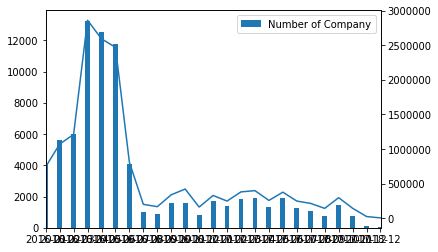

In [145]:
# Demonstrate above data in a frame
# Bar chart refers to the total of new company each month
# Line chart refers to the monthly new MRR.

dfNew[['Number of Company']].plot(kind='bar', width = .35)
dfNew['Sum MRR'].plot(secondary_y=True)

ax = plt.gca()
#plt.xlim([-width, len(m1_t['normal'])-width])
ax.set_xticklabels(dfChurned['date'])

plt.show()

In [99]:
# Summarize the number of churned company and churned MRR each month in a dataframe "dfChurned"

dfChurned['Number of Company'] = churnNum
dfChurned['Sum MRR'] = churnMRR
dfChurned['date'] = date 
dfChurned.head()

,date,Number of Company,Sum MRR
0,2016-01,64,1.505000e+04
1,2016-02,255,8.062500e+04
2,2016-03,539,9.429333e+04
3,2016-04,5750,1.251039e+06
4,2016-05,6641,1.363568e+06


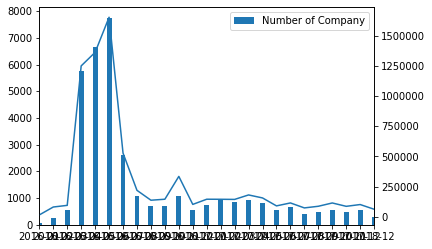

In [120]:
# Demonstrate above data in a frame
# Bar chart refers to the total of churned company each month
# Line chart refers to the monthly churned MRR.

dfChurned[['Number of Company']].plot(kind='bar', width = .35)
dfChurned['Sum MRR'].plot(secondary_y=True)

ax = plt.gca()
#plt.xlim([-width, len(m1_t['normal'])-width])
ax.set_xticklabels(dfChurned['date'])

plt.show()

In [140]:
# Calculate net Company number and MRR by substracting data of dfNew by dfChurned
netNum = [np.subtract(x1, x2) for (x1, x2) in zip(newNum, churnNum)]
netMRR = [np.subtract(x1, x2) for (x1, x2) in zip(newMRR, churnMRR)]

In [141]:
# Construct data of net in the dataframe "dfNet"
dfNet = pd.DataFrame(columns=columns)
dfNet = dfNet.fillna(0)
dfNet.head()

,date,Number of Company,Sum MRR


In [142]:
# Summarize the number of net company and net MRR each month in a dataframe "dfChurned"

dfNet['Number of Company'] = netNum
dfNet['Sum MRR'] = netMRR
dfNet['date'] = date 
dfNet.head()

,date,Number of Company,Sum MRR
0,2016-01,4058,7.293515e+05
1,2016-02,5370,9.907240e+05
2,2016-03,5433,1.117420e+06
3,2016-04,7501,1.611313e+06
4,2016-05,5860,1.230104e+06


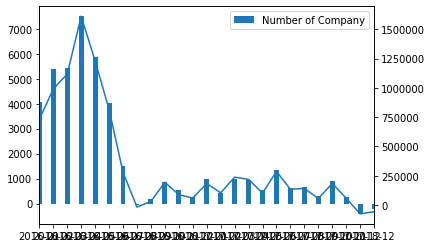

In [143]:
# Demonstrate above data in a frame
# Bar chart refers to the total of net company each month
# Line chart refers to the monthly net MRR.

dfNet[['Number of Company']].plot(kind='bar', width = .35)
dfNet['Sum MRR'].plot(secondary_y=True)

ax = plt.gca()
#plt.xlim([-width, len(m1_t['normal'])-width])
ax.set_xticklabels(dfChurned['date'])

plt.show()

## Filter with Category

In [ ]:
newB, dfChurned

In [211]:
# filter provided category of data in each month 
def filterDict(dictionary, category):
    filterDict = {}
    for k, v in dictionary.items():
        filterDict[k] = v[v['Category']==category]
    return filterDict

In [212]:
# Store targeted category in a list.
column = ['Interior Decorators', 'Interior Design', 'Basement Renovation', 'Kitchen Planning & Renovation', 'Kitchen & Bathroom - Cabinets & Design']

In [213]:
# Store each category of each month in a dictionary "FilteredDict"
def returnDict(dictionary):
    FilteredDict = {}
    for category in column:
        FilteredDict[category] = filterDict(dictionary, category)
    return FilteredDict

In [259]:
# Filter for new companies
newFilterDict = returnDict(newB)

In [260]:
# Filtered for churned companies
churnedFilterDict = returnDict(churned)

In [216]:
# Calculate related company number and mrr of each category by each month and store them in a dictionary.
def processData(filterD):
    dictNew = {}
    for category, filterDict in filterD.items():
        dictNew[category] = {}
        filterCompanyNum = []
        filterMRR = []
        for month, monthDict in filterDict.items():
            if len(monthDict.index) == 0:
                filterCompanyNum.append(0)
                filterMRR.append(0)
                
            else:
                filterCompanyNum.append(len(monthDict.index))
                filterMRR.append((monthDict['MRR'].sum(axis=0)))
        dictNew[category]['num'] = filterCompanyNum
        dictNew[category]['mrr'] = filterMRR
    return dictNew

In [233]:
# Get data for new company and mrr
newFilterDictResult = processData(newFilterDict)

In [234]:
# Get data for churned company and mrr
churnedFilterDictResult = processData(churnedFilterDict)

In [235]:
newFilterCompanyDF = pd.DataFrame(columns=column)
newFilterCompanyDF = newFilterCompanyDF.fillna(0)

In [236]:
# Display the number of new company of each category of each month
for category, dictionary in newFilterDictResult.items():
    for k, v in dictionary.items():       
        newFilterCompanyDF[category] = dictionary['num']
newFilterCompanyDF['date'] = date
newFilterCompanyDF.head()

,Interior Decorators,Interior Design,Basement Renovation,Kitchen Planning & Renovation,Kitchen & Bathroom - Cabinets & Design,date
0,0,17,0,46,237,2016-01
1,0,0,0,276,46,2016-02
2,46,12,92,46,46,2016-03
3,0,92,109,230,184,2016-04
4,0,46,184,184,230,2016-05


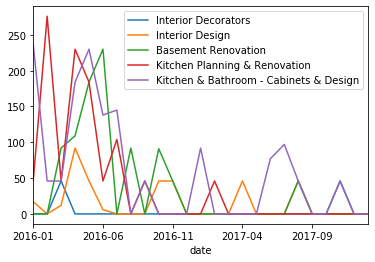

In [244]:
# Plot the graph above
ax = plt.gca()

newFilterCompanyDF.plot(kind='line',x='date',ax=ax)
#newFilterCompanyDF.plot(kind='line',x='date',y='num_pets', color='red', ax=ax)

plt.show()

In [241]:
# Display the new MRR of each category of each month

newFilterMrrDF = pd.DataFrame(columns=column)
newFilterMrrDF = newFilterMrrDF.fillna(0)

for category, dictionary in newFilterDictResult.items():
    for k, v in dictionary.items():       
        newFilterMrrDF[category] = dictionary['mrr']
newFilterMrrDF['date'] = date
newFilterMrrDF.head()

,Interior Decorators,Interior Design,Basement Renovation,Kitchen Planning & Renovation,Kitchen & Bathroom - Cabinets & Design,date
0,0.0,3825.000000,0.0,10350.0,44333.333332,2016-01
1,0.0,0.000000,0.0,46690.0,9200.000000,2016-02
2,6900.0,1560.000000,20700.0,12650.0,6900.000000,2016-03
3,0.0,19933.333332,36450.0,47725.0,37950.000000,2016-04
4,0.0,5750.000000,43930.0,39675.0,36800.000000,2016-05


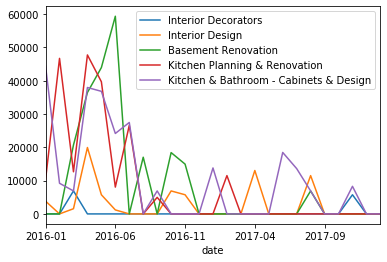

In [245]:
# Plot the graph above

ax = plt.gca()

newFilterMrrDF.plot(kind='line',x='date',ax=ax)
#newFilterCompanyDF.plot(kind='line',x='date',y='num_pets', color='red', ax=ax)

plt.show()

In [242]:
# Display the number of churned company of each category of each month

churnedFilterCompanyDF = pd.DataFrame(columns=column)
churnedFilterCompanyDF = churnedFilterCompanyDF.fillna(0)

for category, dictionary in churnedFilterDictResult.items():
    for k, v in dictionary.items():       
        churnedFilterCompanyDF[category] = dictionary['num']
churnedFilterCompanyDF['date'] = date
churnedFilterCompanyDF.head()

,Interior Decorators,Interior Design,Basement Renovation,Kitchen Planning & Renovation,Kitchen & Bathroom - Cabinets & Design,date
0,0,0,0,0,9,2016-01
1,0,0,0,0,0,2016-02
2,0,0,0,0,0,2016-03
3,0,46,63,92,0,2016-04
4,0,46,0,138,138,2016-05


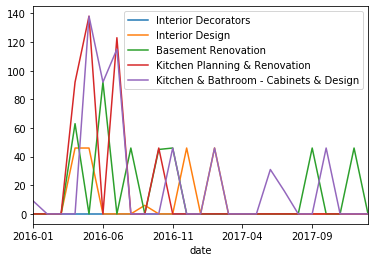

In [246]:
# Plot the graph above

ax = plt.gca()

churnedFilterCompanyDF.plot(kind='line',x='date',ax=ax)
#newFilterCompanyDF.plot(kind='line',x='date',y='num_pets', color='red', ax=ax)

plt.show()

In [243]:
# Display churned mrr of each category of each month

churnedFilterMrrDF = pd.DataFrame(columns=column)
churnedFilterMrrDF = churnedFilterCompanyDF.fillna(0)

for category, dictionary in churnedFilterDictResult.items():
    for k, v in dictionary.items():       
        churnedFilterMrrDF[category] = dictionary['mrr']
churnedFilterMrrDF['date'] = date
churnedFilterMrrDF.head()

,Interior Decorators,Interior Design,Basement Renovation,Kitchen Planning & Renovation,Kitchen & Bathroom - Cabinets & Design,date
0,0,0.000000,0.0,0.0,1800.0,2016-01
1,0,0.000000,0.0,0.0,0.0,2016-02
2,0,0.000000,0.0,0.0,0.0,2016-03
3,0,13033.333332,11150.0,18975.0,0.0,2016-04
4,0,6900.000000,0.0,28750.0,21850.0,2016-05


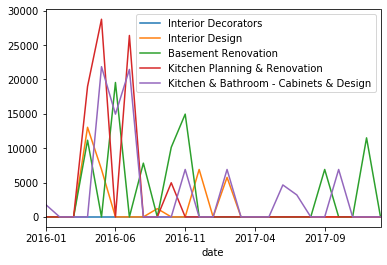

In [247]:
# Plot the graph above

ax = plt.gca()

churnedFilterMrrDF.plot(kind='line',x='date',ax=ax)
#newFilterCompanyDF.plot(kind='line',x='date',y='num_pets', color='red', ax=ax)

plt.show()